## Marketing Analysis : Classification

#### Tujuan 
    Kamu merupakan seorang data analis dan diberi tugas oleh Manajer Pemasaran untuk menganalisa data pemasaran dengan tujuan memprediksi respon/reaksi pelanggan terhadap kampanye iklan pemasaran ke depannya. Hasil akhir yang diharapkan kamu dapat memberikan saran model machine learning yang tepat untuk memprediksi respon tersebut.
#### Mengenai data :
    Data yang digunakan merupakan publik dataset yang saya peroleh dari kaggle. Dataset ini sendiri dibentuk oleh salah satu perusahaan start up di brazil untuk menguji kandidat data analyst, maka dari itu saya cukup tertarik untuk menganalisa data ini. 

### Data Cleaning
    Sebelum melakukan prediksi, data yang akan digunakan harus bersih/clean. Oleh karena itu, kita pastikan tidak ada nilai Null, data terduplikasi, dan nilai ekstrem(outlier). 

In [73]:
# load python library
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [74]:
# import dataset to python

df = pd.read_csv('D:\Data analytics\Projects\marketing analytics\ifood_df.csv')
df

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,61223.0,0,1,46,709,43,182,42,118,247,...,0,0,0,0,1,0,0,1094,847,0
2201,64014.0,2,1,56,406,0,30,0,0,8,...,1,0,0,0,0,0,1,436,428,1
2202,56981.0,0,0,91,908,48,217,32,12,24,...,0,0,0,0,1,0,0,1217,1193,1
2203,69245.0,0,1,8,428,30,214,80,30,61,...,1,0,0,0,0,1,0,782,721,0


In [75]:
df_copy = df.copy()

In [76]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

In [77]:
df_copy.isnull().sum().sort_values(ascending=False)

Income                  0
marital_Together        0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Widow           0
Complain                0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
Z_CostContact           0
AcceptedCmp2            0
Kidhome                 0
MntGoldProds            0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
NumDealsPurchases       0
AcceptedCmp1            0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmpO

In [78]:
# Cek nilai duplikasi dalam data
df_copy.duplicated().sum()

184

In [79]:
# Kita hilangkan nilai duplikat dalam data
df_copy.drop_duplicates(keep=False, inplace=True)
df_copy.shape

(1843, 39)

In [80]:
df_copy.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000,...,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000
mean,51755.752577,0.443842,0.512751,48.734129,307.167119,26.308193,166.813348,37.400977,27.416712,43.837222,...,0.244710,0.034726,0.091156,0.023874,0.500271,0.166576,0.218123,565.106348,521.269126,0.305480
std,20727.936663,0.534853,0.548639,28.951696,337.913890,39.733319,222.103689,54.895591,42.066386,51.690589,...,0.430032,0.183135,0.287909,0.152698,0.500136,0.372698,0.413083,577.679708,555.773676,0.680508
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.000000
25%,35683.000000,0.000000,0.000000,24.000000,23.500000,2.000000,16.000000,2.500000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000,42.000000,0.000000
50%,51650.000000,0.000000,0.000000,49.000000,179.000000,8.000000,68.000000,12.000000,8.000000,24.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,344.000000,290.000000,0.000000
75%,68145.000000,1.000000,1.000000,74.000000,508.000000,33.000000,225.000000,50.000000,34.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.500000,883.000000,0.000000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,197.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.000000


In [81]:
df_copy.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall'],
      dtype='object')

In [82]:
# Hilangkan variabel yang tidak kita butuhkan
remove_columns = ['Kidhome', 'Teenhome','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response','marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow','education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD','AcceptedCmpOverall','MntTotal']
df_outlier = df_copy.drop(columns=remove_columns)
df_outlier.columns

Index(['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Age', 'Customer_Days',
       'MntRegularProds'],
      dtype='object')

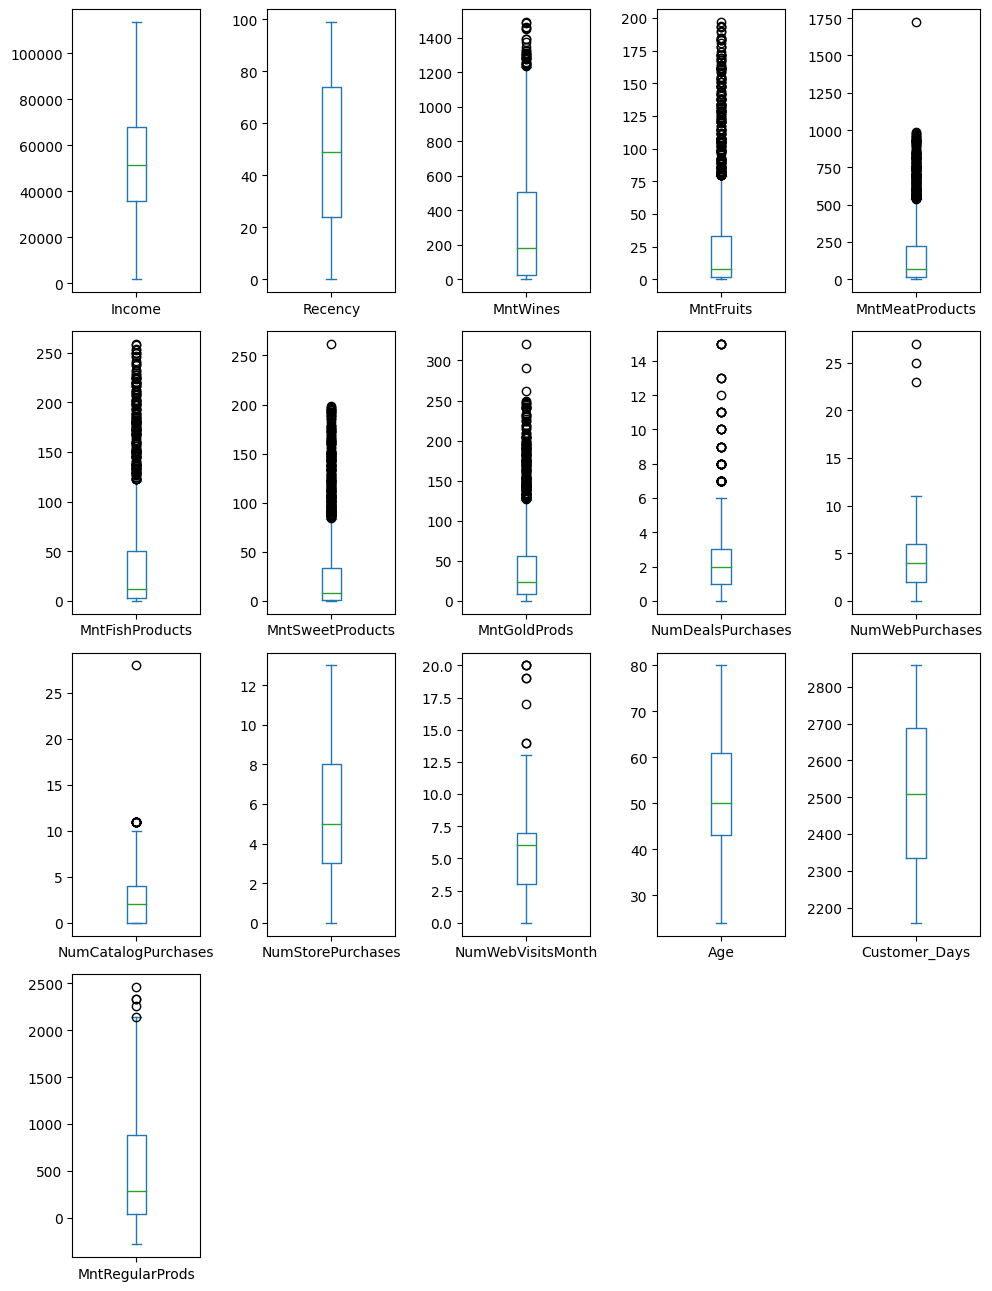

In [83]:
# Boxplot dapat digunakan untuk mengetahui apakah ada outliers dalam data
df_outlier.plot(subplots=True, layout=(5,5), kind='box', figsize=(10,16))
plt.tight_layout()

In [84]:
# Mengganti nilai outliers Variabel NumDealsPurchases
deals_median = df_outlier['NumDealsPurchases'].median()
Q1 = df_outlier['NumDealsPurchases'].quantile(0.25)

Q3 = df_outlier['NumDealsPurchases'].quantile(0.75)

IQR = Q3 - Q1

deals_outlier = Q3 + 1.5*IQR


In [85]:
df_copy['NumDealsPurchases'] = np.where(df_copy['NumDealsPurchases'] >deals_outlier, deals_median,df_copy['NumDealsPurchases'])

In [86]:
# Mengganti nilai outliers Variabel NumWebPurchases
web_median = df_outlier['NumWebPurchases'].median()
Q1 = df_outlier['NumWebPurchases'].quantile(0.25)

Q3 = df_outlier['NumWebPurchases'].quantile(0.75)

IQR = Q3 - Q1

web_outlier = Q3 + 1.5*IQR

In [87]:
df_copy['NumWebPurchases'] = np.where(df_copy['NumWebPurchases'] >web_outlier, web_median,df_copy['NumWebPurchases'])

In [88]:
# Mengganti nilai outliers Variabel NumCatalogPurchases
catalog_median = df_outlier['NumCatalogPurchases'].median()
Q1 = df_outlier['NumCatalogPurchases'].quantile(0.25)

Q3 = df_outlier['NumCatalogPurchases'].quantile(0.75)

IQR = Q3 - Q1

catalog_outlier = Q3 + 1.5*IQR

In [89]:
df_copy['NumCatalogPurchases'] = np.where(df_copy['NumCatalogPurchases'] >catalog_outlier, catalog_median,df_copy['NumCatalogPurchases'])

In [90]:
# Mengganti nilai outliers Variabel NumCatalogPurchases
webvis_median = df_outlier['NumWebVisitsMonth'].median()
Q1 = df_outlier['NumWebVisitsMonth'].quantile(0.25)

Q3 = df_outlier['NumWebVisitsMonth'].quantile(0.75)

IQR = Q3 - Q1

webvis_outlier = Q3 + 1.5*IQR

In [91]:
df_copy['NumWebVisitsMonth'] = np.where(df_copy['NumWebVisitsMonth'] >webvis_outlier, web_median,df_copy['NumWebVisitsMonth'])

In [92]:
# Mengganti nilai outliers Variabel MntRegularProds
regular_median = df_outlier['MntRegularProds'].median()
Q1 = df_outlier['MntRegularProds'].quantile(0.25)

Q3 = df_outlier['MntRegularProds'].quantile(0.75)

IQR = Q3 - Q1

regular_outlier = Q3 + 1.5*IQR

In [93]:
df_copy['MntRegularProds'] = np.where(df_copy['MntRegularProds'] >regular_outlier, regular_median,df_copy['MntRegularProds'])

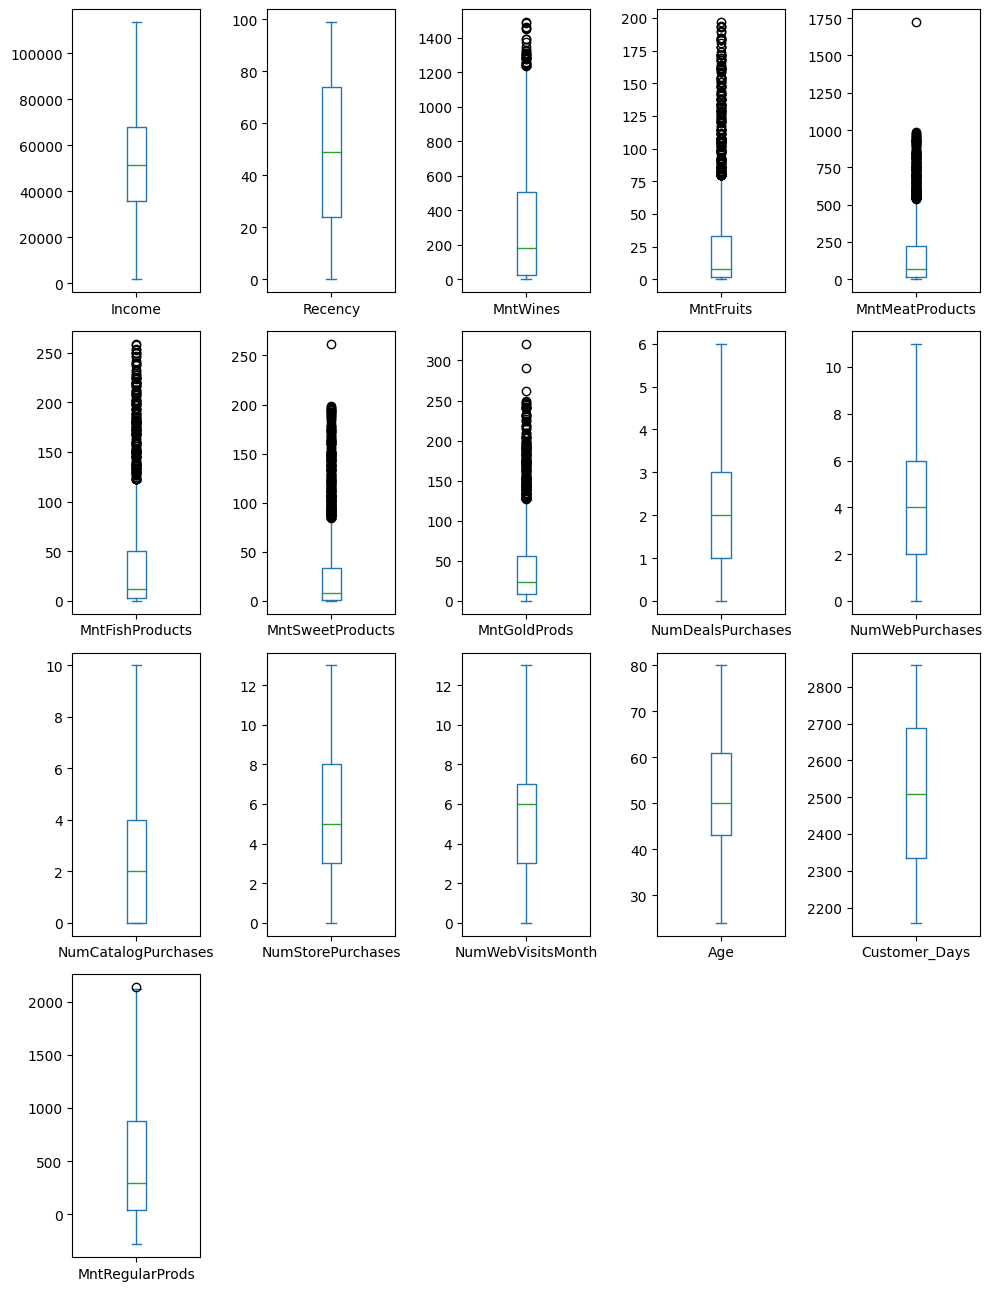

In [94]:
# Kita Cek kembali apakah Outlier masih ada

df_outlier_cleaned = df_copy.drop(columns=remove_columns)

df_outlier_cleaned.plot(subplots=True, layout=(5,5), kind='box', figsize=(10,16))
plt.tight_layout()

In [95]:
# 2n cycle dan master merupakan variabel yang sama, jadi kita satukan dalam variabel yang sama
df_copy['education_MasterDegree'] = df_copy['education_2n Cycle'] + df_copy['education_Master']

In [96]:
df_copy.drop(columns=["education_2n Cycle","education_Master"], inplace=True)

### Classification Models
    Untuk memprediksi respon pelanggan akan kampanye iklan, kita menggunakan metode klasifikasi yang mana cara kerja metode ini membuat data baru(prediksi) berdasarkan data sebelumnya. Beberapa algoritma yang digunakan dalam notebook ini adalah :
    1. K-Nearest Neighbor(KNN)
    2. Logistic Regression
    3. Support Vector Machine
    4. Decision Tree Classifier
    5. Random Forest Classifer

#### Class and Features
    Class merupakan target atau variabel yang ingin kita prediksi yang mana pada kasus ini adalah variabel Response, sedangkan Features adalah variabel independent yang mempengaruhi variabel dependent/target. 

In [97]:
# Menentukan Class/target

y = df_copy['Response']
y.head()

0    1
1    0
2    0
3    0
4    0
Name: Response, dtype: int64

In [98]:
df_copy.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_Basic', 'education_Graduation', 'education_PhD', 'MntTotal',
       'MntRegularProds', 'AcceptedCmpOverall', 'education_MasterDegree'],
      dtype='object')

In [99]:
# Menetapkan Features/variabel independent

features = ['Income', 'Kidhome', 'Teenhome', 'Recency','marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_Basic', 'education_Graduation', 'education_PhD','education_MasterDegree','NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
X = df_copy[features]
X = X.select_dtypes(exclude=['object'])
X.head()

,Income,Kidhome,Teenhome,Recency,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_Basic,education_Graduation,education_PhD,education_MasterDegree,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,58138.0,0,0,58,0,0,1,0,0,0,1,0,0,3.0,8.0,10.0,4,7.0
1,46344.0,1,1,38,0,0,1,0,0,0,1,0,0,2.0,1.0,1.0,2,5.0
2,71613.0,0,0,26,0,0,0,1,0,0,1,0,0,1.0,8.0,2.0,10,4.0
3,26646.0,1,0,26,0,0,0,1,0,0,1,0,0,2.0,2.0,0.0,4,6.0
4,58293.0,1,0,94,0,1,0,0,0,0,0,1,0,5.0,5.0,3.0,6,5.0


#### Split data
    langkah selanjutnya, membagi data menjadi 2 bagian yaitu training dataset dan test dataset menggunakan train_test_split. Fungsi membagi data menjadi 2 untuk melatih model dan menguji model tersebut.

In [100]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)

#### K Nearest Neighbor(KNN)

In [101]:
# Import modul KNN

from sklearn.neighbors import KNeighborsClassifier

In [102]:
# Mengetahui berapa banyak neighbor yang optimal dalam algoritma

from sklearn.metrics import accuracy_score


k_range = list(range(1,26))
scores= []
for k in k_range:
    model_knn = KNeighborsClassifier(n_neighbors=k) # konfigurasi algoritma
    model_knn.fit(X_train, y_train) #Training model classifier
    y_pred = model_knn.predict(X_test) #melakukan prediksi
    scores.append(accuracy_score(y_test, y_pred)) # evaluasi performa

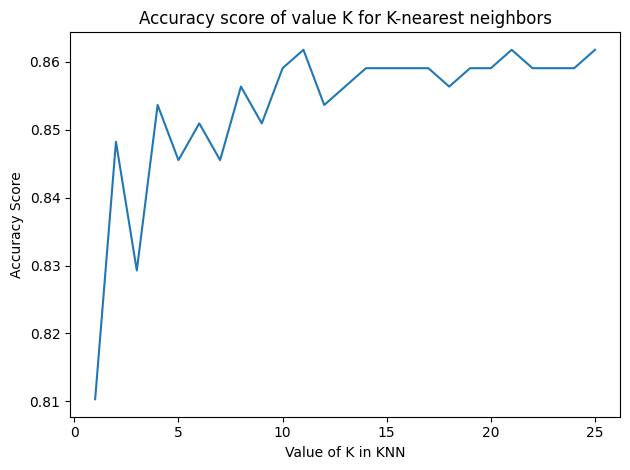

In [103]:
# Plotting nilai K dan berapa score yang dihasilkan
plt.plot(k_range, scores)
plt.xlabel('Value of K in KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy score of value K for K-nearest neighbors')
plt.tight_layout() 
plt.show()

In [125]:
# Membuat algoritma KNN dengan value K sebesar 11
model_knn = KNeighborsClassifier(n_neighbors=11)
model_knn.fit(X_train, y_train) 
y_pred = model_knn.predict(X_test) 

In [126]:
# Menghitung akurasi model machine learning KNN
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


print('accuracy score:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

accuracy score: 0.8617886178861789
              precision    recall  f1-score   support

           0       0.87      0.99      0.92       316
           1       0.67      0.08      0.14        53

    accuracy                           0.86       369
   macro avg       0.77      0.53      0.53       369
weighted avg       0.84      0.86      0.81       369

[[314   2]
 [ 49   4]]


Observasi :
1. Secara keseluruhan skor akurasi model KNN memperoleh nilai 86%
2. Namun, jika dipecah akurasi antara prediksi tidak merespon dan merespon iklan maka akan ditemukan bahwa model tidak cukup baik dalam memprediksi apakah pelanggan akan merespon.
3. f1-score untuk respon __0(not response)__ sebesar 92% sedangkan untuk __1(Response)__ hanya sebesar 14%. Artinya model hanya berhasil memprediksi __not response__ dan gagal dalam mempredisksi __Response__
4. Ini juga didukung oleh hasil __Confusion matrix__ yang menghitung sebanyak 314 prediksi benar dari 316 untuk __Not Response__ sedangkan __Response__ hanya benar 4 dari 53 prediksi.

#### Logistic Regression


In [127]:
from sklearn.linear_model import LogisticRegression

In [128]:

model_logreg = LogisticRegression(solver='lbfgs', multi_class='auto')
model_logreg.fit(X_train, y_train)
y_pred = model_logreg.predict(X_test)

In [129]:
print('Accuracy Score:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=0))
print(confusion_matrix(y_test, y_pred))

Accuracy Score: 0.8563685636856369
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       316
           1       0.00      0.00      0.00        53

    accuracy                           0.86       369
   macro avg       0.43      0.50      0.46       369
weighted avg       0.73      0.86      0.79       369

[[316   0]
 [ 53   0]]


Observasi :
Nilai 0 pada label __1__ disebabkan karena model algoritma tidak memprediksi label tersebut yang mana memberikan masalah pada perhitungan  **Precision(pembagi menjadi 0)**. Ketika fungsi dihadapkan pada permasalahan ini maka hasil otomatis akan memberikan nilai 0. 

[More Info](https://stackoverflow.com/questions/66022943/how-to-fix-this-classification-report-warning)

#### Support Vector Classifier


In [130]:
# Import modul SVM
from sklearn.svm import SVC

In [131]:
# SVC Model
model_svc = SVC(gamma='scale')
model_svc.fit(X_train, y_train)
y_pred = model_svc.predict(X_test)

In [132]:
print('accuracy_score:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=0))
print(confusion_matrix(y_test, y_pred))

accuracy_score: 0.8563685636856369
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       316
           1       0.00      0.00      0.00        53

    accuracy                           0.86       369
   macro avg       0.43      0.50      0.46       369
weighted avg       0.73      0.86      0.79       369

[[316   0]
 [ 53   0]]


#### Decision Tree Classifer

In [133]:
# Import modul Decision Tree
from sklearn.tree import DecisionTreeClassifier

In [134]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)
y_pred = model_dt.predict(X_test)

In [135]:
print('accuracy_score:', accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))

accuracy_score: 0.7859078590785907
              precision    recall  f1-score   support

           0       0.89      0.85      0.87       316
           1       0.30      0.38      0.34        53

    accuracy                           0.79       369
   macro avg       0.60      0.62      0.60       369
weighted avg       0.81      0.79      0.80       369

[[270  46]
 [ 33  20]]


#### Random Forest Classifier

In [136]:
# Import modul Random Forest
from sklearn.ensemble import RandomForestClassifier

In [137]:
model_rf = RandomForestClassifier(n_estimators=100)
model_rf.fit(X_train, y_train)
y_pred = model_rf.predict(X_test)

In [138]:
print('accuracy_score:', accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

accuracy_score: 0.8617886178861789
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       316
           1       0.54      0.28      0.37        53

    accuracy                           0.86       369
   macro avg       0.71      0.62      0.65       369
weighted avg       0.84      0.86      0.84       369

[[303  13]
 [ 38  15]]


#### Naive Bayes

In [139]:
from sklearn.naive_bayes import GaussianNB

In [140]:
model_gnb = GaussianNB()
model_gnb.fit(X_train, y_train)
y_pred = model_gnb.predict(X_test)

In [141]:
y_test.shape

(369,)

In [142]:
print('accuracy_score:', accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))

accuracy_score: 0.8563685636856369
              precision    recall  f1-score   support

           0       0.89      0.94      0.92       316
           1       0.50      0.34      0.40        53

    accuracy                           0.86       369
   macro avg       0.70      0.64      0.66       369
weighted avg       0.84      0.86      0.84       369

[[298  18]
 [ 35  18]]


#### Accuracy comparison from all models 

In [143]:
models = [model_knn, model_logreg, model_svc, model_dt, model_rf, model_gnb]
accuracy_scores = []
for model in models:
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    
print(accuracy_scores)

[0.8617886178861789, 0.8563685636856369, 0.8563685636856369, 0.7859078590785907, 0.8617886178861789, 0.8563685636856369]


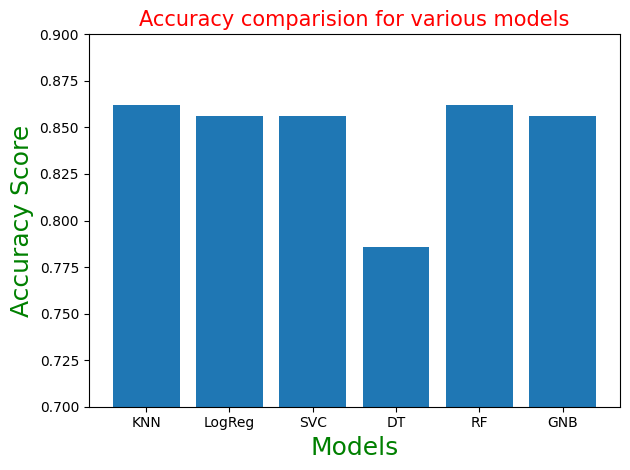

In [144]:
plt.bar(['KNN', 'LogReg', 'SVC', 'DT', 'RF', 'GNB'],accuracy_scores)
plt.ylim(0.70,0.90)
plt.title('Accuracy comparision for various models', fontsize=15, color='r')
plt.xlabel('Models', fontsize=18, color='g')
plt.ylabel('Accuracy Score', fontsize=18, color='g')
plt.tight_layout()